<a href="https://colab.research.google.com/github/haylee94/section3-project/blob/main/section3_lastdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
myfile = '/content/drive/MyDrive/Row_암보험_보장지수.xlsx'
df = pd.read_excel(myfile)
df.head(1)

,기준년월,고객생년월일,성별코드,일반암진단비보장항목수,일반암진단비보장금액,갑상선암진단비보장항목수,갑상선암진단비보장금액,경계성종양진단비보장항목수,경계성종양진단비보장금액,제자리암진단비보장항목수,...,계약상태명,계약시작일자,계약종료일자,보장순번,보장항목값,보장항목명,내부보장항목명,보장분류결과값,보장항목상태명,보장금액
0,202109,1981****,M,1,20000000,0,0,0,0,0,...,정상,20061012,20601012,0,A4200,암진단,암진단보험금합산,"암진단비,고액암진단비,유방암진단비,자궁암진단비,전립선암진단비,방광암진단비",정상,20000000


In [4]:
df.columns

Index(['기준년월', '고객생년월일', '성별코드', '일반암진단비보장항목수', '일반암진단비보장금액', '갑상선암진단비보장항목수',
       '갑상선암진단비보장금액', '경계성종양진단비보장항목수', '경계성종양진단비보장금액', '제자리암진단비보장항목수',
       '제자리암진단비보장금액', '기타피부암진단비보장항목수', '기타피부암진단비보장금액', '유방암진단비보장항목수',
       '유방암진단비보장금액', '전립선암진단비보장항목수', '전립선암진단비보장금액', '자궁암진단비보장항목수',
       '자궁암진단비보장금액', '방광암진단비보장항목수', '방광암진단비보장금액', '보험계약번호', '보험회사값', '보험회사명',
       '보험상품값', '보험상품명', '계약상태명', '계약시작일자', '계약종료일자', '보장순번', '보장항목값', '보장항목명',
       '내부보장항목명', '보장분류결과값', '보장항목상태명', '보장금액'],
      dtype='object')

In [6]:
df = df.drop(['보험계약번호', '보험회사값', '보험상품값', '계약시작일자', '계약종료일자', '보장순번', '보장항목값', '보장항목명','내부보장항목명', '보장분류결과값', '보장항목상태명','보장금액',
              '일반암진단비보장항목수', '갑상선암진단비보장항목수','경계성종양진단비보장항목수', '제자리암진단비보장항목수','기타피부암진단비보장항목수', '유방암진단비보장항목수',
              '전립선암진단비보장항목수','자궁암진단비보장항목수', '방광암진단비보장항목수'], axis=1)
df.columns

Index(['기준년월', '고객생년월일', '성별코드', '일반암진단비보장금액', '갑상선암진단비보장금액', '경계성종양진단비보장금액',
       '제자리암진단비보장금액', '기타피부암진단비보장금액', '유방암진단비보장금액', '전립선암진단비보장금액',
       '자궁암진단비보장금액', '방광암진단비보장금액', '보험회사명', '보험상품명', '계약상태명'],
      dtype='object')

In [5]:
df = df[df['계약상태명']!='정상(심사중)']

In [7]:
df = df.astype({'기준년월':'str'})
df["기준연도"] = df["기준년월"].str[0:4]
df['고객생일연도'] = df['고객생년월일'].str.extract(r'(\d+)')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81356 entries, 0 to 81860
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   기준년월          81356 non-null  object
 1   고객생년월일        81356 non-null  object
 2   성별코드          81356 non-null  object
 3   일반암진단비보장금액    81356 non-null  int64 
 4   갑상선암진단비보장금액   81356 non-null  int64 
 5   경계성종양진단비보장금액  81356 non-null  int64 
 6   제자리암진단비보장금액   81356 non-null  int64 
 7   기타피부암진단비보장금액  81356 non-null  int64 
 8   유방암진단비보장금액    81356 non-null  int64 
 9   전립선암진단비보장금액   81356 non-null  int64 
 10  자궁암진단비보장금액    81356 non-null  int64 
 11  방광암진단비보장금액    81356 non-null  int64 
 12  보험회사명         81356 non-null  object
 13  보험상품명         81356 non-null  object
 14  계약상태명         81356 non-null  object
 15  기준연도          81356 non-null  object
 16  고객생일연도        81356 non-null  object
dtypes: int64(9), object(8)
memory usage: 11.2+ MB


In [9]:
df = df.astype({'고객생일연도':'int'})
df = df.astype({'기준연도':'int'})
df['나이'] = df['기준연도'] - df['고객생일연도']

In [10]:
df = df.drop(['계약상태명','기준년월','고객생년월일', '기준연도', '고객생일연도'], axis=1)

In [11]:
df = df[['나이', '성별코드', '일반암진단비보장금액', '갑상선암진단비보장금액', '경계성종양진단비보장금액', '제자리암진단비보장금액', '기타피부암진단비보장금액',
         '유방암진단비보장금액', '전립선암진단비보장금액', '자궁암진단비보장금액', '방광암진단비보장금액', '보험회사명', '보험상품명']]
df.sample(2)

,나이,성별코드,일반암진단비보장금액,갑상선암진단비보장금액,경계성종양진단비보장금액,제자리암진단비보장금액,기타피부암진단비보장금액,유방암진단비보장금액,전립선암진단비보장금액,자궁암진단비보장금액,방광암진단비보장금액,보험회사명,보험상품명
65146,55,M,30000000,30000000,30000000,30000000,30000000,30000000,30000000,30000000,10000000,한화생명보험,한화생명 100세보장 건강보험 무배당(2종)(일반형)
18188,28,M,70000000,6000000,6000000,6000000,6000000,70000000,70000000,70000000,70000000,삼성생명보험,無퓨처30+퍼펙트통합보장Ⅰ표준


In [12]:
df.rename(columns={'일반암진단비보장금액':'일반암진단비'}, inplace=True)
df.rename(columns={'갑상선암진단비보장금액':'갑상선암진단비'}, inplace=True)
df.rename(columns={'경계성종양진단비보장금액':'경계성종양진단비'}, inplace=True)
df.rename(columns={'제자리암진단비보장금액':'제자리암진단비'}, inplace=True)
df.rename(columns={'기타피부암진단비보장금액':'기타피부암진단비'}, inplace=True)
df.rename(columns={'유방암진단비보장금액':'유방암진단비'}, inplace=True)
df.rename(columns={'전립선암진단비보장금액':'전립선암진단비'}, inplace=True)
df.rename(columns={'자궁암진단비보장금액':'자궁암진단비'}, inplace=True)
df.rename(columns={'방광암진단비보장금액':'방광암진단비'}, inplace=True)

In [13]:
df = pd.melt(df,id_vars=['나이','성별코드','보험회사명','보험상품명'],
             value_vars=['일반암진단비','갑상선암진단비','경계성종양진단비','제자리암진단비','기타피부암진단비','유방암진단비','전립선암진단비','자궁암진단비','방광암진단비'],
             var_name='담보',value_name='가입금액')

# melt(id_vars='',value_vars='') id_vars->기준이되는 컬럼지정 / value_vars->녹여서 값과 같이 행으로 들어갈 컬럼
# melt 파라미터에 컬럼명 변경 기능이 있다(index 별도설정 안해도 됨) / var_name='', value_name=''
# melt 시킬 컬럼을 제외하고 나머지가 기준이 된다. (id_vars->기준이되는 컬럼지정)

In [14]:
df.sample(2)

,나이,성별코드,보험회사명,보험상품명,담보,가입금액
9830,43,F,AIA생명보험,（무）프라임평생설계２형,일반암진단비,71000000
496807,32,F,메트라이프생명보험,무배당 360 암보험(갱신형),전립선암진단비,253278000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732204 entries, 0 to 732203
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   나이      732204 non-null  int64 
 1   성별코드    732204 non-null  object
 2   보험회사명   732204 non-null  object
 3   보험상품명   732204 non-null  object
 4   담보      732204 non-null  object
 5   가입금액    732204 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 33.5+ MB


In [16]:
df.to_csv('project_finaldata.csv', index=False)

KeyboardInterrupt: ignored

In [16]:
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum.
(Reading database ... 123942 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumBarunGothic


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import warnings
warnings.filterwarnings(action='ignore')

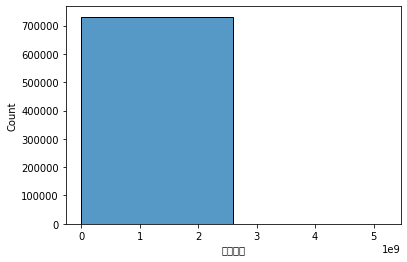

In [18]:
# 타겟의 분포를 확인
sns.histplot(df['가입금액'], bins=2)

In [19]:
# 수치형 컬럼과 타겟간의 상관관계를 확인, 상관관계가 높은 순서 컬럼
# target = 가입금액
df.corr()['가입금액'].sort_values(ascending=False).head()

가입금액    1.000000
나이     -0.078084
Name: 가입금액, dtype: float64

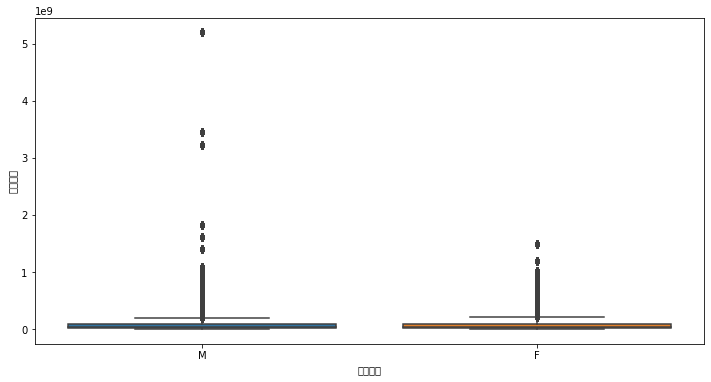

In [20]:
# 범주형 컬럼과 타겟과의 관계
fig = plt.figure()
fig.set_size_inches(12, 6)
sns.boxplot(data=df, x='성별코드', y='가입금액')

In [21]:
pd.set_option('display.float_format', '{:,.1f}'.format)

In [22]:
df.describe() #가입금액이 평균과 중앙값의 차이가 크니까 이상치를 제거해주기

,나이,가입금액
count,"732,204.0","732,204.0"
mean,41.0,"71,937,419.4"
std,13.2,"178,416,144.5"
min,14.0,0.0
25%,29.0,"10,000,000.0"
50%,40.0,"36,000,000.0"
75%,52.0,"85,000,000.0"
max,84.0,"5,200,000,000.0"


In [23]:
df = df[df['가입금액'] < 1000000000]
df = df[df['가입금액'] != 0]

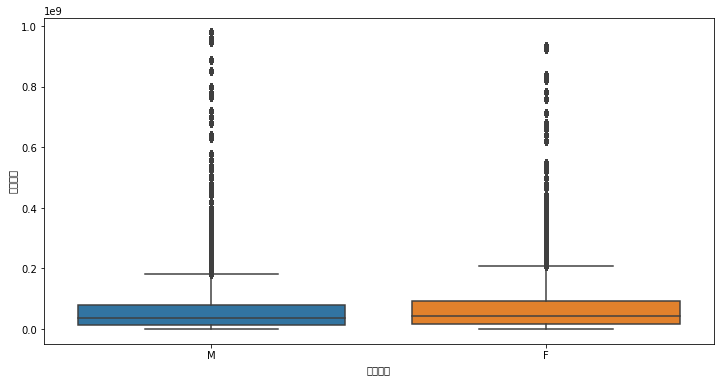

In [24]:
# 범주형 컬럼과 타겟과의 관계
fig = plt.figure()
fig.set_size_inches(12, 6)
sns.boxplot(data=df, x='성별코드', y='가입금액')

In [25]:
df = df[df['가입금액'] < 400000000]

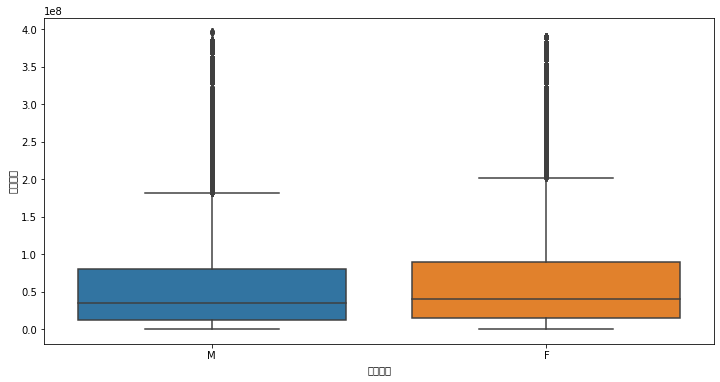

In [26]:
# 범주형 컬럼과 타겟과의 관계
fig = plt.figure()
fig.set_size_inches(12, 6)
sns.boxplot(data=df, x='성별코드', y='가입금액')

In [27]:
df.describe()

,나이,가입금액
count,"682,903.0","682,903.0"
mean,41.2,"60,667,993.9"
std,13.2,"64,470,580.7"
min,14.0,"100,000.0"
25%,29.0,"13,000,000.0"
50%,40.0,"40,000,000.0"
75%,52.0,"85,952,000.0"
max,84.0,"395,385,000.0"


In [28]:
df = df[df['가입금액'] < 13000000]

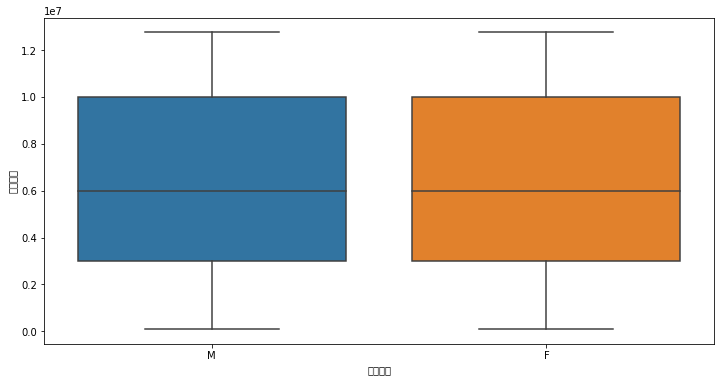

In [29]:
# 범주형 컬럼과 타겟과의 관계
fig = plt.figure()
fig.set_size_inches(12, 6)
sns.boxplot(data=df, x='성별코드', y='가입금액')

In [30]:
df['보험회사명'].unique()

array(['푸르덴셜생명보험', '삼성생명보험', '에이스손해보험', '메리츠화재보험', '삼성화재해상보험', 'DB손해보험',
       '하나손해보험', 'NH농협생명보험', '한화생명보험', '현대해상화재보험', '흥국화재해상보험', '교보생명보험',
       'ABL생명보험', '한화손해보험', 'KB손해보험', '동양생명보험', '새마을금고중앙회', 'MG손해보험',
       '라이나생명보험', '우정사업본부', 'KDB생명보험', '교직원공제회보험', '신한라이프생명보험', 'AIA생명보험',
       '롯데손해보험', '미래에셋생명보험', '흥국생명보험', 'AIG손해보험', 'NH농협손해보험', '메트라이프생명보험',
       '교보라이프플래닛생명보험', 'AXA손해보험', 'DB생명보험', 'DGB생명보험', '푸본현대생명보험',
       'KB생명보험', '신용협동조합중앙회', '하나생명보험', '처브라이프생명보험', '수산업협동조합중앙회',
       'BNP파리바카디프생명보험'], dtype=object)

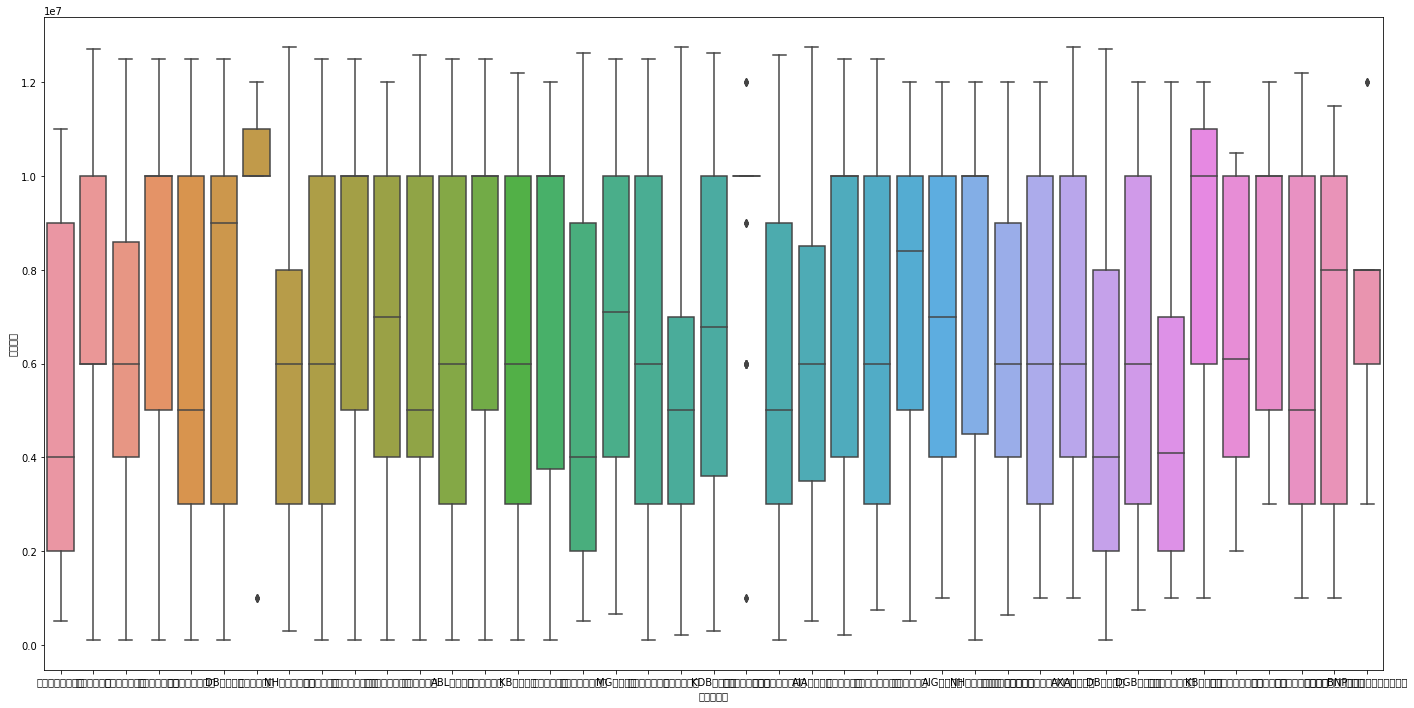

In [31]:
# 범주형 컬럼과 타겟과의 관계
fig = plt.figure()
fig.set_size_inches(24, 12)
sns.boxplot(data=df, x='보험회사명', y='가입금액')

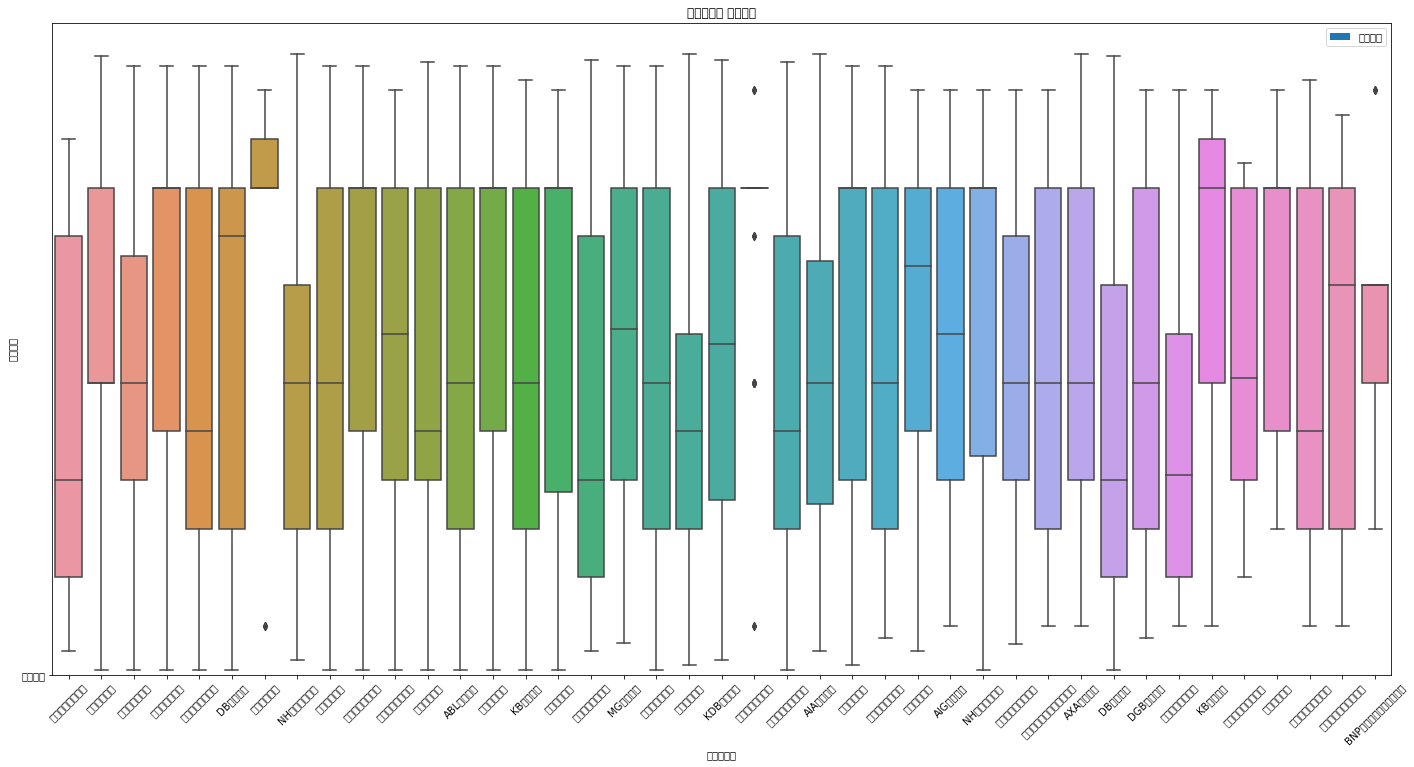

In [32]:
fig = plt.figure()
plt.title('보험회사별 가입금액')
fig.set_size_inches(24, 12)
ax = plt.subplot(1, 1, 1)
ax.bar([i * 2 for i in range(len('보험회사명'))], '가입금액', label='가입금액')
plt.xticks([i * 2 + 0.5 for i in range(len('보험회사명'))], '보험회사명')

for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)

plt.legend()
sns.boxplot(data=df, x='보험회사명', y='가입금액')
plt.show()

In [28]:
'''
a = df[(df['보험회사명']=='흥국생명보험') & (df['가입금액'] < 250000000)]
b = df[(df['보험회사명']=='DB손해보험') & (df['가입금액'] < 180000000)]
c = df[df['보험회사명']=='신한생명보험']
d = df[(df['보험회사명']=='삼성생명보험') & (df['가입금액'] < 200000000)]
e = df[(df['보험회사명']=='삼성화재해상보험') & (df['가입금액'] < 180000000)]
f = df[(df['보험회사명']=='푸르덴셜생명보험') & (df['가입금액'] < 150000000)]
g = df[(df['보험회사명']=='흥국화재해상보험') & (df['가입금액'] < 200000000)]
h = df[(df['보험회사명']=='현대해상화재보험') & (df['가입금액'] < 180000000)]
i = df[(df['보험회사명']=='라이나생명보험') & (df['가입금액'] < 280000000)]
j = df[(df['보험회사명']=='교보생명') & (df['가입금액'] < 250000000)]
k = df[(df['보험회사명']=='KB손해보험') & (df['가입금액'] < 180000000)]
l = df[(df['보험회사명']=='KDB생명보험') & (df['가입금액'] < 20000000)]
m = df[(df['보험회사명']=='한화손해보험') & (df['가입금액'] < 200000000)]
n = df[(df['보험회사명']=='한화생명보험') & (df['가입금액'] < 250000000)]
o = df[(df['보험회사명']=='메리츠화재보험') & (df['가입금액'] < 180000000)]
p = df[(df['보험회사명']=='AIA생명보험') & (df['가입금액'] < 200000000)]
q = df[(df['보험회사명']=='동양생명보험') & (df['가입금액'] < 220000000)]
r = df[(df['보험회사명']=='신한라이프생명보험') & (df['가입금액'] < 250000000)]
s = df[(df['보험회사명']=='미래에셋생명보험') & (df['가입금액'] < 220000000)]
t = df[(df['보험회사명']=='ABL생명보험') & (df['가입금액'] < 250000000)]
u = df[(df['보험회사명']=='우정사업본부') & (df['가입금액'] < 250000000)]
v = df[(df['보험회사명']=='MG손해보험') & (df['가입금액'] < 200000000)]
w = df[(df['보험회사명']=='AIG손해보험') & (df['가입금액'] < 220000000)]
x = df[(df['보험회사명']=='에이스손해보험') & (df['가입금액'] < 200000000)]
y = df[(df['보험회사명']=='메트라이프생명보험') & (df['가입금액'] < 180000000)]
z = df[(df['보험회사명']=='NH농협손해보험') & (df['가입금액'] < 220000000)]
A = df[(df['보험회사명']=='롯데손해보험') & (df['가입금액'] < 200000000)]
B = df[(df['보험회사명']=='새마을금고중앙회') & (df['가입금액'] < 200000000)]
C = df[(df['보험회사명']=='수산업협동조합중앙회') & (df['가입금액'] < 200000000)]
D = df[(df['보험회사명']=='DB생명보험') & (df['가입금액'] < 220000000)]
E = df[(df['보험회사명']=='처브라이프생명보험')]
F = df[(df['보험회사명']=='DGB생명보험') & (df['가입금액'] < 250000000)]
G = df[(df['보험회사명']=='하나손해보험') & (df['가입금액'] < 150000000)]
H = df[(df['보험회사명']=='KB생명보험')]
I = df[(df['보험회사명']=='푸본현대생명보험') & (df['가입금액'] < 200000000)]
J = df[(df['보험회사명']=='NH농협생명보험') & (df['가입금액'] < 200000000)]
K = df[(df['보험회사명']=='AXA손해보험') & (df['가입금액'] < 250000000)]
L = df[(df['보험회사명']=='교보라이프플래닛생명보험') & (df['가입금액'] < 250000000)]
M = df[(df['보험회사명']=='신용협동조합중앙회') & (df['가입금액'] < 250000000)]
N = df[(df['보험회사명']=='하나생명보험')]
O = df[(df['보험회사명']=='교직원공제회보험')]
P = df[(df['보험회사명']=='BNP파리바카디프생명보험')]
'''

In [ ]:
# df = pd.concat([a,b,c,d,e,f,g,h,i,j,i,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P])

In [33]:
# 데이터를 나누기
from sklearn.model_selection import train_test_split

target = df['가입금액']

train_val, test = train_test_split(df, test_size=0.2, random_state=42)
train, val = train_test_split(train_val, train_size=0.8, test_size=0.20, random_state=42)

X_train = train.drop('가입금액', axis=1)
y_train = train['가입금액']

X_val = val.drop('가입금액', axis=1)
y_val = val['가입금액']

X_test = test.drop('가입금액', axis=1)
y_test = test['가입금액']

# train, test 데이터가 잘 나눠졌는지 확인
X_train.shape, X_test.shape, X_val.shape, y_val.shape, y_train.shape, y_test.shape


((105555, 5), (32986, 5), (26389, 5), (26389,), (105555,), (32986,))

In [34]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 1.0 MB/s 


In [35]:
# encoding -> 수치화 시킴
from category_encoders import OrdinalEncoder
od = OrdinalEncoder()
X_train_od = od.fit_transform(X_train)
X_val_od = od.transform(X_val)
X_test_od = od.transform(X_test)

# 문자형 데이터가 없는 것을 확인할 수 있습니다.
(X_train_od.dtypes == 'object').sum()

od.category_mapping #범주형 특성이 어떻게 변환이 되었는지는 .category_mapping 메소드를 사용

[{'col': '성별코드', 'mapping': M      1
  F      2
  NaN   -2
  dtype: int64, 'data_type': dtype('O')},
 {'col': '보험회사명', 'mapping': 라이나생명보험           1
  AIA생명보험           2
  새마을금고중앙회          3
  우정사업본부            4
  삼성화재해상보험          5
  DB손해보험            6
  삼성생명보험            7
  에이스손해보험           8
  KB손해보험            9
  동양생명보험           10
  메리츠화재보험          11
  NH농협생명보험         12
  흥국화재해상보험         13
  흥국생명보험           14
  신한라이프생명보험        15
  MG손해보험           16
  메트라이프생명보험        17
  현대해상화재보험         18
  교보생명보험           19
  처브라이프생명보험        20
  한화손해보험           21
  교보라이프플래닛생명보험     22
  한화생명보험           23
  NH농협손해보험         24
  롯데손해보험           25
  KDB생명보험          26
  DB생명보험           27
  AXA손해보험          28
  미래에셋생명보험         29
  AIG손해보험          30
  DGB생명보험          31
  ABL생명보험          32
  푸본현대생명보험         33
  푸르덴셜생명보험         34
  KB생명보험           35
  하나손해보험           36
  수산업협동조합중앙회       37
  신용협동조합중앙회        38
  교직원공제회보험         39
  하나생명보험      

In [36]:
# 기준모델 - 최빈값
y_base = [y_train.mode()]*len(y_train)

# 기준모델 정확도
from sklearn.metrics import accuracy_score
print("training accuracy: ", accuracy_score(y_train, y_base).round(2))

training accuracy:  0.21


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rf = RandomForestClassifier(
    random_state=42, criterion='entropy', oob_score=True, n_jobs=-1, max_depth=3)
rf.fit(X_train_od, y_train)
y_pred_rf = rf.predict(X_val_od)

print("훈련 정확도", rf.score(X_train_od, y_train))
print("검증 정확도", rf.score(X_val_od, y_val))
#print("f1 score: ", f1_score(y_val, y_pred_rf).round(3))

훈련 정확도 0.2612666382454645
검증 정확도 0.25980522187275


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rf = RandomForestClassifier(
    random_state=42, criterion='entropy', oob_score=True, n_jobs=-1, max_depth=6, n_estimators = 200)
rf.fit(X_train_od, y_train)
y_pred_rf = rf.predict(X_val_od)

print("훈련 정확도", rf.score(X_train_od, y_train))
print("검증 정확도", rf.score(X_val_od, y_val))
#print("f1 score: ", f1_score(y_val, y_pred_rf).round(3))

훈련 정확도 0.30020368528255414
검증 정확도 0.2995187388684679


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rf = RandomForestClassifier(
    random_state=42, criterion='entropy', oob_score=True, n_jobs=-1, max_depth=8, n_estimators = 200)
rf.fit(X_train_od, y_train)
y_pred_rf = rf.predict(X_val_od)

print("훈련 정확도", rf.score(X_train_od, y_train))
print("검증 정확도", rf.score(X_val_od, y_val))
#print("f1 score: ", f1_score(y_val, y_pred_rf).round(3))

훈련 정확도 0.34593339964947184
검증 정확도 0.3413543521922013


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rf = RandomForestClassifier(
    random_state=42, criterion='entropy', oob_score=True, n_jobs=-1, max_depth=10, n_estimators = 400, min_samples_split=8, min_samples_leaf=8)
rf.fit(X_train_od, y_train)
y_pred_rf = rf.predict(X_val_od)

print("훈련 정확도", rf.score(X_train_od, y_train))
print("검증 정확도", rf.score(X_val_od, y_val))
#print("f1 score: ", f1_score(y_val, y_pred_rf).round(3))

훈련 정확도 0.4245843399175785
검증 정확도 0.405547766114669


In [42]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
        booster='gbtree', # dart보다 성능 좋았음
        objective='binary:logistic',
        eval_metric="error",  # error = 1 - accuracy 지표를 사용해 평가합니다.
        n_estimators=500,
        random_state=42,
        n_jobs=2,
        max_depth=6,
        learning_rate=0.1,
        # scale_pos_weight = 8062/25661, # 타겟이 불균형, 설정하니 정확도 떨어짐
        colsample_bytree=0.3, # 컬럼 중 일부 샘플링해서 학습, 작을수록 과적합 감소
        subsample=0.3, # 데이터 중 일부 샘플링해서 학습, 낮을수록 과적합 감소
        min_child_weight=16,# 관측치에 대한 가중치 합의 최소
        reg_lambda=2, # 클수록 과적합 감소
        alpha=1 # 클수록 과적합 감소
        )
xgb.fit(X_train_od, y_train)
y_pred_rf = xgb.predict(X_val_od)

print("훈련 정확도", xgb.score(X_train_od, y_train))
print("검증 정확도", xgb.score(X_val_od, y_val))


KeyboardInterrupt: ignored

In [44]:
## X 특성들의 테이블과, y 타겟 벡터를 만듭니다
feature = ['나이']
target = ['가입금액']
X_train = df[feature]
y_train = df[target]

## 모델을 학습(fit)합니다
rf.fit(X_train, y_train)

## 새로운 데이터 한 샘플을 선택해 학습한 모델을 통해 예측해 봅니다
X_test = [[29]]
y_pred = rf.predict(X_test)
print(f'{X_test[0][0]} 의 예상 가입금액의 평균은 {int(y_pred)}원 입니다.')

29 의 예상 가입금액의 평균은 10000000원 입니다.
